#### Deep Learning
1. Object detection
    * Localizaion/Detection은 해당 object의 위치를 bounding box로 찾고 bounding box 내의 object를 판별한다. 
    * Localizaion/Detection은 Bounding box regression(box의 좌표값 예측)과 classification 두 개의 문제가 합쳐져 있다. 
    * Localizaion에 비해서 Detectiondms 두 개 이상의 Object를 이미지의 임의의 위치에서 찾아야 하므로 상대적으로 Localizaion보다 여러가지 문제에 봉착한다.  

2. Object detection의 주요 구성 요소 
    * Region Proposal(영역추정)
    * Feature Extraction(Back bone) 
    * FPN 
    * Network Prediction 
    * IOU 
    * NMS
    * mAP
    * Anchor box 
3. Object detection Model 
    * Back bone - Neck - Head 

4. Object localization 
    1. Original image 
    2. Feature extractor 
    3. Feature map 
    4. Fully connected layer 
    5. Bounding box regression 

5. Object detection 
    * 이미지의 어느 위치에서 object를 찾아야 하는가? 
    

    



#### Sliding Window 
1. Sliding window
    * Window를 왼쪽 상단에서 오른쪽 하단으로 이동 시키면서 object를 detection하는 방식 
    * 다양한 형태의 window를 각각 sliding 시키는 방식 
    * window scale를 고종하고 scale을 변경한 여러 이미지를 사용하는 방식 
    * object detection의 초기 기법으로 활용 
    * object가 없는 영역도 무조건 sliding하여야 하며 여러 형태의 window와 여러 scale를 가진 이미지를 스캔하여 검출해야 하므로 수행시간이 오래 걸리고 검출 성능이 상대적으로 낮다. 
    * Region Proposal (영역 추정) 기법의 등장으로 활용도는 떨어졌지만, Object dectction 발전을 위한 토대를 제공 


#### Region Proposal
1. Resion Proposal(영역 추정)
    * Object가 있을만한 후보 영역을 찾자 
        1. Origianl image 
        2. 후보 Bounding box 선택 
        3. 최종 Object detection 
2. Selective search(https://github.com/AlpacaDB/selectivesearch) 
    1. Selective search의 개요
        * Region Proposal의 대표방법
        * 높은 Detection과 높은 Reall 예측 성능을 동시에 만족하는 알고리즘 
        * Color , Texture, Size, Shape 에 따라 유사한 Region을 계층적으로 그룹핑 방법으로 계산 
        * Selective search 는 최초에 Pixel Intensity에 기반한 graph-based segment 기법에 따라서 Over Segmentation을 수행한다. 
    2. Selective search의 수행 프로세스 
        * 개별 Segment된 모든 부분들을 Bounding box로 만들어서 Region Proposal 리스트로 추가 
        * Color, Texture, Size, Shape에 따라 유사도가 비슷한 Segment를 그룹핑한다. 
        * 위의 두 단계를 반복적으로 수행하면서 Region Proposal을 수행한다. 
     

In [2]:
from google.colab import drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install selectivesearch

In [28]:
FILE_PATH = "drive/MyDrive/dataset/image/"

In [4]:
import cv2 
import os 
import selectivesearch 
import matplotlib.pyplot as plt 

In [44]:
def get_show_image(image):
    plt.figure(figsize= (8, 8))
    plt.imshow(image)
    plt.axis(True)
    plt.show()

def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape {images[i].shape}")

In [45]:
image = cv2.cvtColor(cv2.imread(FILE_PATH + "audrey01.jpg"), cv2.COLOR_BGR2RGB)

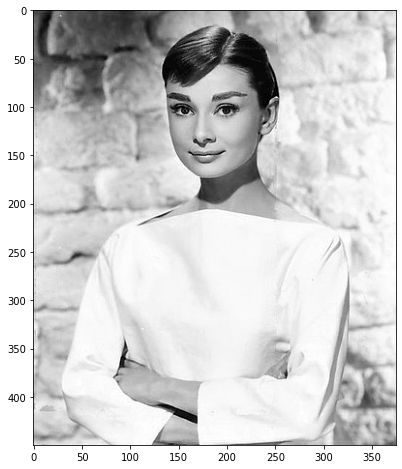

shape (450, 375, 3)


In [46]:
get_show_image(image)
get_show_shape([image])

#### selectivesearch 
1. selective_search 
    * scale : scale를 크게 하면 큰 object를 작게하면 작은 object
    * min_size : Object의 크기 

In [53]:
_, regions = selectivesearch.selective_search(image, scale=40, min_size=1000)
print(type(regions), len(regions))

<class 'list'> 87


#### Region 
1. Region
    * 반환된 Regions 변수를 list타입으로 세부 원소를 dictionary로 가지고 있다. 
    * rect key  : x, y 시작 좌표와 너비, 높이 값을 가진다 **이 값이 Detected Object 후보를 나타내는 Bounding box이다**
    * labels는 해당 rect로 지정된 Bounding box내에 있는 object의 고유 ID 
    * 아래로 내려 갈 수록 너비와 높이 값인 큰 Bounding box이며 하나의 Bounding box에 여러개의 object가 있을 확률이 커진다. 


In [ ]:
regions
rects_value = [key["rect"] for key in regions]
for i, value in enumerate (rects_value):
    print(f"index {i}, {value}")

In [69]:
def get_show_box_bounding(image, rects_value):
    
    green_box = (155, 255, 51)   
    image_copy = image.copy()
    
    for rect in rects_value:
        left=rect[0]
        top= rect[1]
        right = left + rect[2]
        bottom = top + rect[3]

        image_copy = cv2.rectangle(image_copy, (left, top), (right, bottom), color=green_box, thickness=2)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_copy)
    plt.show()

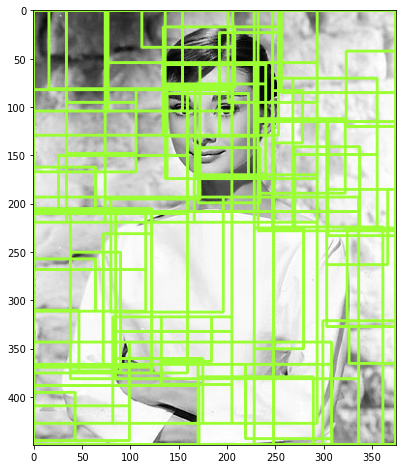

In [68]:
get_show_box_bounding(image, rects_value)

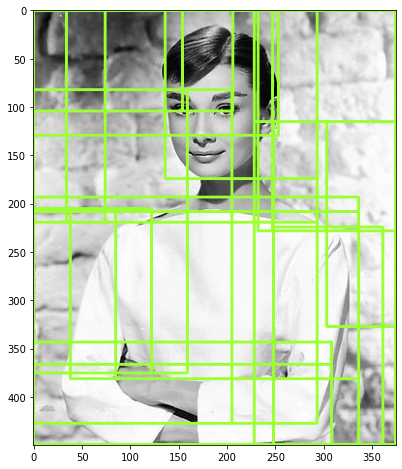

In [71]:
big_rects_value = [keys["rect"]for keys in regions if keys["size"]>10000]
get_show_box_bounding(image, big_rects_value)